In [1]:
%run setup_workspace.ipynb # loads data

In [2]:
from fbprophet import Prophet
import pandas as pd
from datetime import date

In [3]:
data = daily_energy_consumption
data.ds.min(), data.ds.max()

(datetime.date(2011, 1, 1), datetime.date(2018, 8, 3))

# Creating a Prophet model

## 1. Train-test-split

In [4]:
split_date = date(2016,1,1)
min_date = date(2013,1,1)
max_date = date(2017,1,1)

train = data[data.ds < split_date]
test = data[data.ds > split_date]

if min_date is not None:
    train = train[train['ds'] > min_date]
if max_date is not None:
    test = test[test['ds'] < max_date]

## Visualization

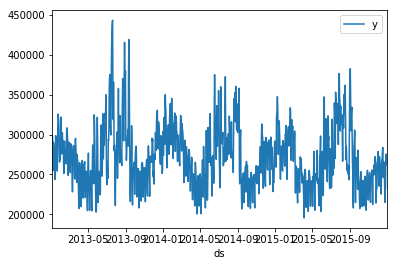

In [5]:
train.set_index('ds').plot()

## 2. Model training

In [6]:
%%time
model = Prophet()
model.fit(train)

/home/veronika/.virtualenvs/idsc-2019/lib/python3.5/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CPU times: user 232 ms, sys: 56 ms, total: 288 ms
Wall time: 185 ms


## 3. Forecast

In [7]:
future = test.drop(columns='y')
forecast = model.predict(future)

## 4. Evaluation 

In [8]:
error = mean_absolute_percentage_error(test[['y']].values, forecast[['yhat']].values)
print('MAPE:%0.2f%%'%error)

MAPE:8.01%


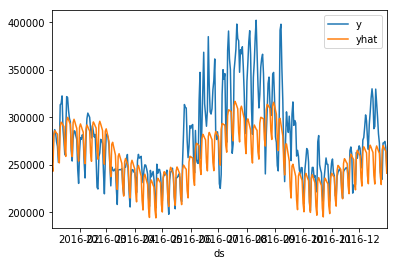

In [9]:
tmp = test.copy().reset_index(drop=True)[['ds','y']]
tmp['yhat'] = forecast.yhat
tmp.set_index('ds', drop=True).plot()

## 5. Decomposition

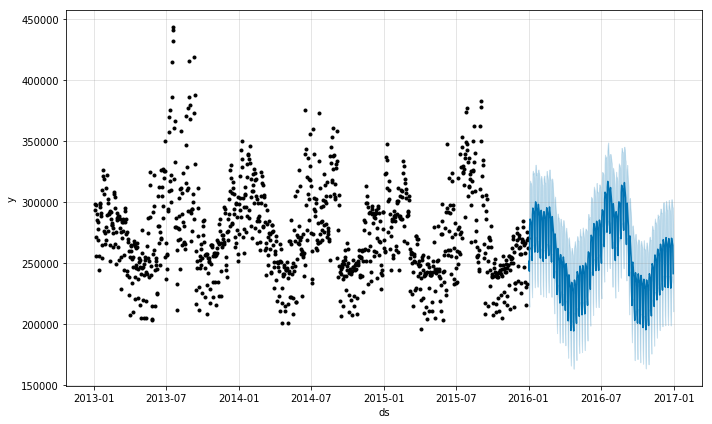

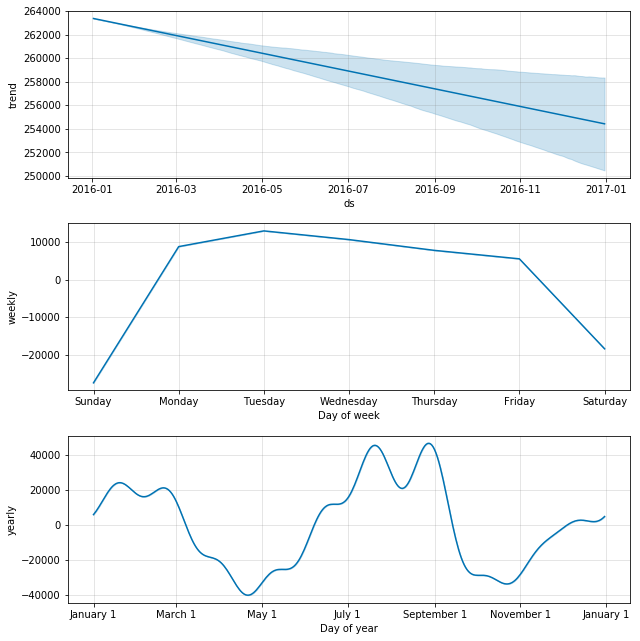

In [10]:
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)